# Price Index of iPhone 16 globally with reasons of markup %
## Team members

| Members       | ccid |
|--------------|---------------------------------------------------------------|
|Shivaansh bhatia| shivaans|
| ShanShan He|shansha9|

# Importing the Libraries

In [ ]:
from datascience import *

import json

import requests

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

from IPython.core.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Applying the iphone price table within different countries

#### Fetching Web Page Content:

We use webscraping to fetch the table of iphone 16 prices in different countries using Beautiful Soap library and then extracting the table and converting to dataframe and finally converting into a datascience library Table


In [ ]:
url ='https://www.jagranjosh.com/general-knowledge/which-countries-sells-iphones-cheaper-than-india-1698415980-1'
r = requests.get(url)
r.text
soup = BeautifulSoup(r.text, 'html.parser')
soup.title

<title>10 Countries Where iPhone 16 is Cheaper Than India </title>

#### Extracting the first HTML table

In [ ]:
table = soup.find_all('table')[0]

#### Displaying the HTML table with display_table functon

In [ ]:
def display_table(table):
  display(HTML(str(table)))

In [ ]:
display_table(table)

Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
India,"Rs 79,900","Rs 89,900","Rs 1,19,900","Rs 1,44,900"
US,$799,$899,$999,"$1,199"
Converted to INR,"Rs 67,076","Rs 75,471","Rs 83,866","Rs 1,00,657"
UK,£799,£899,£999,"£1,199"
Converted to INR,"Rs 74,100","Rs 83,374","Rs 92,648","Rs 1,11,196"
Dubai (UAE),"AED 3,399","AED 3,799","AED 4,299","AED 5,099"
Converted to INR,"Rs 77,698","Rs 86,842","Rs 98,272","Rs 1,16,559"
China Mainland,"RMB 5,999","RMB 6,999","RMB 7,999","RMB 9,999"
Converted to INR,"Rs 70,836","Rs 82,645","Rs 94,453","Rs 1,1,8070"
Hong Kong,"HK$ 6,899","HK$ 7,699","HK$ 8,599","HK$ 10,199"


#### Displaying with the defined scape_table function as to return a table object from the Data frame

In [ ]:
def scrape_table(table):
    df = pd.read_html(str(table)) #return as list
    df = pd.DataFrame(df[0]) #return as a Pandas DataFrame
    if df.columns[0]==0:
      df.columns = df.iloc[0] #using first row as the heading instead of default headings
    return Table.from_df(df) #return as a table

In [ ]:
iphone = scrape_table(table)
iphone.show(3)

<ipython-input-56-adaf5c078b53>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) #return as list


Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
India,"Rs 79,900","Rs 89,900","Rs 1,19,900","Rs 1,44,900"
US,$799,$899,$999,"$1,199"


## Cleaning Data from Iphone table

###Return a table with only price with local currency



####Removing the first repetitive first row and the rows with 'Converted to INR'

In [ ]:
#removing the repitive heading row
iphone=iphone.remove(0)

#removing all the rows with conversions to INR
iphone=iphone.where("Country",are.not_containing("Converted"))
iphone.show(3)

Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
India,"Rs 79,900","Rs 89,900","Rs 1,19,900","Rs 1,44,900"
US,$799,$899,$999,"$1,199"
UK,£799,£899,£999,"£1,199"


####Get_number Fuction : Take only the digit part from column and convert it to a float class for later analysis

In [ ]:
def get_number(price):
  price=str(price)
  astr=''
  for i in price:
    if i.isdigit():
      astr+=i
  return float(astr)

####Applying the function to every iphone product

In [ ]:
#applying the cleaning function to all the prices
for col in iphone.labels[1:]:
  temp=iphone.apply(get_number,f'{col}')
  iphone=iphone.with_column(f'{col}',temp)

iphone.show(3)

Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
India,79900,89900,119900,144900
US,799,899,999,1199
UK,799,899,999,1199


####Change_names Function : changeing some of the countries name for easier later analysis

In [ ]:
#changing the required names of Dubai and china mainland
def change_names(country):
  if country=="China Mainland":
    return "China"
  elif country=="Dubai (UAE)":
    return "United Arab Emirates"
  elif country=="US":
    return "United States"

  else:
    return country


temp_=iphone.apply(change_names,"Country")
iphone=iphone.with_column("Country",temp_).sort("Country")
iphone.show(3)



Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
Australia,1399,1599,1799,2149
Canada,1129,1279,1449,1749
China,5999,6999,7999,9999


#Applying exchange rates with respect to Canadian Dollar:

---
### Echange rate API

Intstead of using scraping to extract the data for the currency exchanges we have incorporated the use of API for reliability

***Attribution notice***<br>
https://www.exchangerate-api.com" Rates By Exchange Rate API



####API request to get the currency exchange rate, storing it in a dictionary

In [ ]:
#using API to get exchange rates
url_rate='https://v6.exchangerate-api.com/v6/d23d6ca1cf6a145239cc2bcc/latest/CAD'
response = requests.get(url_rate,verify=False)
exchange_data=response.json()
print(exchange_data)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'v6.exchangerate-api.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1733270402, 'time_last_update_utc': 'Wed, 04 Dec 2024 00:00:02 +0000', 'time_next_update_unix': 1733356802, 'time_next_update_utc': 'Thu, 05 Dec 2024 00:00:02 +0000', 'base_code': 'CAD', 'conversion_rates': {'CAD': 1, 'AED': 2.6129, 'AFN': 48.5253, 'ALL': 66.8086, 'AMD': 284.3601, 'ANG': 1.2735, 'AOA': 663.9745, 'ARS': 720.8414, 'AUD': 1.0974, 'AWG': 1.2735, 'AZN': 1.2114, 'BAM': 1.3235, 'BBD': 1.4229, 'BDT': 85.0201, 'BGN': 1.3238, 'BHD': 0.2675, 'BIF': 2103.3365, 'BMD': 0.7115, 'BND': 0.9571, 'BOB': 4.9248, 'BRL': 4.3214, 'BSD': 0.7115, 'BTN': 60.2774, 'BWP': 9.7258, 'BYN': 2.3965, 'BZD': 1.4229, 'CDF': 2044.3645, 'CHF': 0.6302, 'CLP': 697.5061, 'CNY': 5.1885, 'COP': 3171.901, 'CRC': 361.6558, 'CUP': 17.0753, 'CVE': 74.6168, 'CZK': 17.0694, 'DJF': 126.4434, 'DKK': 5.0477, 'DOP': 43.1191, 'DZD': 95.3004, 'EGP': 35.381, 'ERN'

####Extracting keys and values and displaying them in different columns of a table

In [ ]:
x_rates=exchange_data['conversion_rates']
code=np.array(list(x_rates.keys()))
value=(np.array(list(x_rates.values())))

#print(code,value)
Currency_API_table=Table().with_columns("Code",code,"Values",value)
Currency_API_table.show(10)

Code,Values
CAD,1
AED,2.6129
AFN,48.5253
ALL,66.8086
AMD,284.36
ANG,1.2735
AOA,663.975
ARS,720.841
AUD,1.0974
AWG,1.2735


---
# Applying the currency codes with corresponding names table

####Scraping the currency codes table

Next step was to scrape a table from wikipedia with their corresponding currency codes in order to apply the codes from the API for ease conversion

In [ ]:
url ='https://en.wikipedia.org/wiki/ISO_4217'
r = requests.get(url)
r.text
soup = BeautifulSoup(r.text, 'html.parser')
table_currency=soup.find_all('table')[1]
currency_code=scrape_table(table_currency)
currency_code.show(10)

<ipython-input-56-adaf5c078b53>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) #return as list


Code,Num,D[a],Currency,Locations listed for this currency[b]
AED,784,2,United Arab Emirates dirham,United Arab Emirates
AFN,971,2,Afghan afghani,Afghanistan
ALL,8,2,Albanian lek,Albania
AMD,51,2,Armenian dram,Armenia
ANG,532,2,Netherlands Antillean guilder,"Curaçao (CW), Sint Maarten (SX)"
AOA,973,2,Angolan kwanza,Angola
ARS,32,2,Argentine peso,Argentina
AUD,36,2,Australian dollar,"Australia, Christmas Island (CX), Cocos (Keeling) Island ..."
AWG,533,2,Aruban florin,Aruba
AZN,944,2,Azerbaijani manat,Azerbaijan


####As to the " Locations listed for this currency[b] " column, take only the first country as reference

In [ ]:
def split_countries(country):
  if "," in country:
    return country.split(',')[0].strip()
  else:
    return country

In [ ]:
print(split_countries('Australia, Christmas Island (CX), Cocos (Keeling) Island'))

Australia


####Take only the necessary columns, relabled the " Locations listed for this currency[b] " with " Location ", and applying the function

In [ ]:

#Clean data for country codes and currency
currency_code=currency_code.drop("Num","D[a]")
currency_code=currency_code.relabel("Locations listed for this currency[b]","Locations")

#splitting the countries in the last column for easy use
locations_split=currency_code.apply(split_countries,"Locations")
currency_code=currency_code.with_column("Locations",locations_split)

currency_code=currency_code.with_row(["EUR","Euro","UK"])

currency_code.show(10)

Code,Currency,Locations
AED,United Arab Emirates dirham,United Arab Emirates
AFN,Afghan afghani,Afghanistan
ALL,Albanian lek,Albania
AMD,Armenian dram,Armenia
ANG,Netherlands Antillean guilder,Curaçao (CW)
AOA,Angolan kwanza,Angola
ARS,Argentine peso,Argentina
AUD,Australian dollar,Australia
AWG,Aruban florin,Aruba
AZN,Azerbaijani manat,Azerbaijan


---
### Joining 2 tables: currency_API_table and currency_code Table with the reference of " Code " column

Now we have both the currency rate and country names in one table by using the join function


In [ ]:
joined_forex=Currency_API_table.join("Code",currency_code)
joined_forex.show(3)

Code,Values,Currency,Locations
AED,2.6129,United Arab Emirates dirham,United Arab Emirates
AFN,48.5253,Afghan afghani,Afghanistan
ALL,66.8086,Albanian lek,Albania


---
### Joing new Forex Table to initial iphone table

Gives us only those 11 countries that we need for iphone table and joins it to corresponding rate exchanges from API

In [ ]:
required_forex=joined_forex.join("Locations",iphone,"Country").select("Locations","Code","Values","Currency").sort("Locations")
required_forex.show(10)

Locations,Code,Values,Currency
Australia,AUD,1.0974,Australian dollar
Canada,CAD,1,Canadian dollar
China,CNY,5.1885,Renminbi[6]
Hong Kong,HKD,5.537,Hong Kong dollar
India,INR,60.2783,Indian rupee
Japan,JPY,106.375,Japanese yen
Thailand,THB,24.4922,Thai baht
UK,EUR,0.6767,Euro
United Arab Emirates,AED,2.6129,United Arab Emirates dirham
United States,USD,0.7115,United States dollar


---
### Applying the exchange rates to Iphone table
converting the price to CAD

In [ ]:
def currency_rate(price,rate):
  return price/rate

In [ ]:
currency_rates=required_forex.column("Values")
Converted_table=Table().with_columns("Country",iphone.column("Country"))
for col in iphone.labels[1:]:
  #print(col)
  Converted_table= Converted_table.with_columns(f'{col}',currency_rate(iphone.column(f'{col}'),currency_rates))

Converted_table.show(10)


Country,iPhone 16,iPhone 16 Plus,iPhone 16 Pro,iPhone 16 Pro Max
Australia,1274.83,1457.08,1639.33,1958.26
Canada,1129,1279,1449,1749
China,1156.21,1348.94,1541.68,1927.15
Hong Kong,1245.98,1390.46,1553.01,1841.97
India,1325.52,1491.42,1989.11,2403.85
Japan,1173.21,1314.22,1502.24,1784.26
Thailand,1220.8,1424.94,1629.09,1996.55
UK,1180.73,1328.51,1476.28,1771.83
United Arab Emirates,1300.85,1453.94,1645.3,1951.47
United States,1122.98,1263.53,1404.08,1685.17


In [ ]:
country_most_expensive=Converted_table.sort("iPhone 16",descending=True)
country_least_expensive=Converted_table.sort("iPhone 16",descending=False)


print(f'Country with most expensive iphone 16 is {country_most_expensive.column("Country")[0]} with price $CAD {country_most_expensive.column("iPhone 16")[0]}')
print(f'Country with least expensive iphone 16 is {country_least_expensive.column("Country")[0]} with price $CAD {country_least_expensive.column("iPhone 16")[0]}')

Country with most expensive iphone 16 is India with price $CAD 1325.5184701625626
Country with least expensive iphone 16 is United States with price $CAD 1122.979620520028


# SO WHAT IS CAUSIG THIS HUGE PRICE DIFFERENCE? IS IT INFLATION?

We want to check if its the increasing inflation rate in India
Hypothetically, if the prices of iPhone should be more in a country if theres is high inflation rate

####Scraping the inflation rate of America and displaying

In [ ]:
url_inflation ='https://www.investopedia.com/inflation-rate-by-year-7253832'
r_inflation = requests.get(url_inflation)
r_inflation.text
soup = BeautifulSoup(r_inflation.text, 'html.parser')
table_inflation=soup.find_all('table')
inflation_code=scrape_table(table_inflation)
inflation_code.show(10)

<ipython-input-56-adaf5c078b53>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) #return as list


Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle*,Events Affecting Inflation
Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle*,Events Affecting Inflation
1929,0.60%,nan,August peak,Market crash
1930,-6.40%,nan,Contraction (-8.5%),Smoot-Hawley Tariff Act
1931,-9.30%,nan,Contraction (-6.4%),Dust Bowl began
1932,-10.30%,nan,Contraction (-12.9%),Hoover tax hikes
1933,0.80%,nan,Contraction ended in March (-1.2%),FDR’s New Deal
1934,1.50%,nan,Expansion (10.8%),U.S. debt rose
1935,3.00%,nan,Expansion (8.9%),Social Security
1936,1.40%,nan,Expansion (12.9%),FDR tax hikes
1937,2.90%,nan,Expansion peaked in May (5.1%),Depression resumed


####Remove the repetitive first row and take only the Year and Inflation Rate as independent and dependent values

In [ ]:
inflation_code=inflation_code.remove(0)
inflation_code=inflation_code.drop('Federal Funds Rate','Business Cycle*','Events Affecting Inflation')
inflation_code.show(10)

Year,"Inflation Rate YOY, From Previous Dec."
1929,0.60%
1930,-6.40%
1931,-9.30%
1932,-10.30%
1933,0.80%
1934,1.50%
1935,3.00%
1936,1.40%
1937,2.90%
1938,-2.80%


###Cleaning Data

####Take float number from column

In [ ]:
#take float number from column
def get_percent(percentage):
  percentage=percentage.replace('%','')
  percentage=percentage.replace('.','.')
  return float(percentage)
def get_year_number(year):
  return int(year)

In [ ]:
inflation_rate=inflation_code.apply(get_percent,'Inflation Rate YOY, From Previous Dec.')
inflation_rate=inflation_rate.tolist()
year=inflation_code.apply(get_year_number,'Year')
year=year.tolist()


####Relabled the table, and take only inflation rate after 2007 for analysis


The release year of the first iphone is 2007

In [ ]:
inflation=inflation_code.with_column('Inflation Rate YOY, From Previous Dec.',inflation_rate)
inflation=inflation.relabeled('Inflation Rate YOY, From Previous Dec.','Inflation Rate')
inflation=inflation.with_column('Year',year)
inflation=inflation.where('Year',are.above_or_equal_to(2007))
inflation.show()

Year,Inflation Rate
2007,4.1
2008,0.1
2009,2.7
2010,1.5
2011,3
2012,1.7
2013,1.5
2014,0.8
2015,0.7
2016,2.1


### Predict the inflation rate of Year 2030 with linear regression

In [ ]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [ ]:
standard_units(inflation['Inflation Rate'])

array([ 0.86900884, -1.32774214,  0.100146  , -0.55887929,  0.26490232,
       -0.44904175, -0.55887929, -0.94331072, -0.99822949, -0.22936665,
       -0.22936665, -0.3392042 , -0.1195291 , -0.61379807,  2.46165331,
        2.18705943,  0.48457742])

In [ ]:
correlation(inflation, 'Year','Inflation Rate')

0.42730827358742784

In [ ]:
regression_slope = slope(inflation, 'Year','Inflation Rate')
regression_intercept = intercept(inflation, 'Year','Inflation Rate')
regression_slope, regression_intercept

(0.15882352941176472, -317.5117647058824)

In [ ]:
predicted=fitted_values(inflation,'Year','Inflation Rate')
predicted

array([ 1.24705882,  1.40588235,  1.56470588,  1.72352941,  1.88235294,
        2.04117647,  2.2       ,  2.35882353,  2.51764706,  2.67647059,
        2.83529412,  2.99411765,  3.15294118,  3.31176471,  3.47058824,
        3.62941176,  3.78823529])

####Linear Regression graph of Inflation rate in U.S.

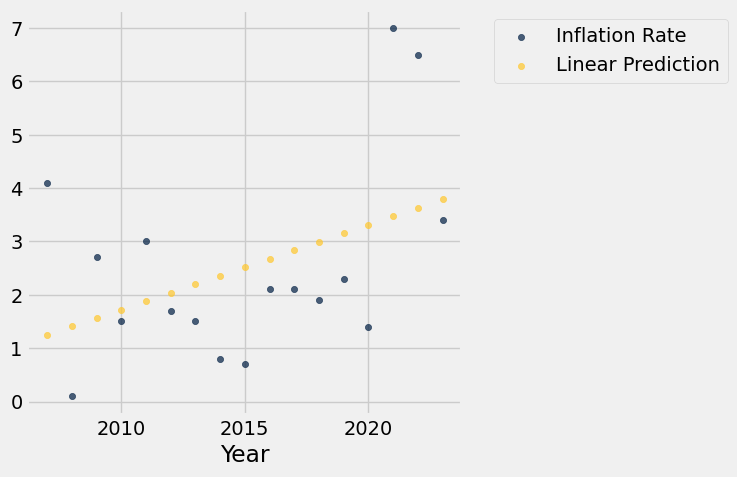

In [ ]:
inflation=inflation.with_column('Linear Prediction',predicted)
inflation.scatter('Year')

####Calculating predicted inflation rate of year 2030 in U.S.

In [ ]:
def fit_line(x, slop, intercept):
  return slop*x + intercept
predicted_2030=round(fit_line(2030,regression_slope,regression_intercept),2)

In [ ]:
f'The predicted inflation rate for 2030 is {predicted_2030:.2f}'

'The predicted inflation rate for 2030 is 4.90'


# Applying inflation rate in India as reference


####Scraping the inflation rate in india and displaying



In [ ]:
url_inflation ='https://www.worlddata.info/asia/india/inflation-rates.php'
r_inflation = requests.get(url_inflation)
r_inflation.text
soup = BeautifulSoup(r_inflation.text, 'html.parser')
table_inflation=soup.find_all('table')
inflation_code=scrape_table(table_inflation)
inflation_code.show(3)

<ipython-input-56-adaf5c078b53>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) #return as list


Year,India,Ø EU,Ø USA,Ø World
2023,5.65 %,6.30 %,4.12 %,5.69 %
2022,6.70 %,8.83 %,8.00 %,7.97 %
2021,5.13 %,2.55 %,4.70 %,3.47 %


####Cleaning Data

In [ ]:

inflation_code=inflation_code.drop('Ø EU','Ø USA','Ø World')
inflation_code.show(3)

Year,India
2023,5.65 %
2022,6.70 %
2021,5.13 %


In [ ]:
inflation_rate=inflation_code.apply(get_percent,'India')
inflation_rate=inflation_rate.tolist()
year=inflation_code.apply(get_year_number,'Year')
year=year.tolist()

####Relabled the table, and take only inflation rate after 2007 for analysis

In [ ]:
inflation_ind=inflation_code.with_column('India',inflation_rate)
inflation_ind=inflation_ind.relabeled('India','Inflation Rate')
inflation_ind=inflation_ind.with_column('Year',year)
inflation_ind=inflation_ind.where('Year',are.above_or_equal_to(2007))
inflation_ind.show(3)

Year,Inflation Rate
2023,5.65
2022,6.7
2021,5.13


In [ ]:
regression_slope_ind = slope(inflation_ind, 'Year','Inflation Rate')
regression_intercept_ind = intercept(inflation_ind, 'Year','Inflation Rate')
regression_slope_ind, regression_intercept_ind

(-0.32468137254901963, 661.20061274509817)

In [ ]:
predicted_ind=fitted_values(inflation_ind,'Year','Inflation Rate')
predicted_ind

array([ 4.37019608,  4.69487745,  5.01955882,  5.3442402 ,  5.66892157,
        5.99360294,  6.31828431,  6.64296569,  6.96764706,  7.29232843,
        7.6170098 ,  7.94169118,  8.26637255,  8.59105392,  8.91573529,
        9.24041667,  9.56509804])

In [ ]:
inflation_ind.show(3)

Year,Inflation Rate
2023,5.65
2022,6.7
2021,5.13


####Linear Regression graph of Inflation rate in India

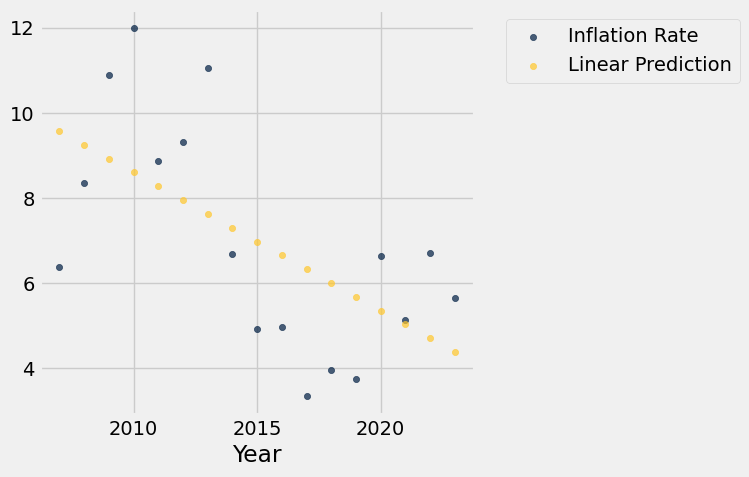

In [ ]:
inflation_ind_fitted=inflation_ind.with_column('Linear Prediction',predicted_ind)
inflation_ind_fitted.scatter('Year')

####Calculating predicted inflation rate of year 2030 in India

In [ ]:
predicted_2030_ind=fit_line(2030,regression_slope_ind,regression_intercept_ind)
predicted_2030_ind


2.0974264705882888

According to our analysis and using the line of best fitting to check the current inflation and future inflation .<br>

According to the analysis, The rate of inflation in **US** should be **~4.9%** annually and **~2.1%** annually in **india** with decreasing trend.<br>
So according to our hypothesis iphones should be more expensive in US and cheaper in India. <br>
Now we turn to Exchange rates and PPP foctor to check if the currency is underperforming or overperforming .<br>
Then we will see how much of a difference is there between the PPP and deviation of PPP from actual exchange rate

---
#Actual Factor

For the ease of reference, lets just consider the base iphone model, which is iphone 16 and compare
For the same iphone 16, what is the price diffenece between Canada and the other countries

In [ ]:
iphone_16_CAD=Converted_table.select("Country","iPhone 16")

In [ ]:
canadian_price=iphone_16_CAD.where("Country",are.equal_to("Canada")).column("iPhone 16")

price_diff_table=iphone_16_CAD.with_column("Difference",iphone_16_CAD.column("iPhone 16")-canadian_price)
price_diff_table

Country,iPhone 16,Difference
Australia,1274.83,145.831
Canada,1129,0
China,1156.21,27.2109
Hong Kong,1245.98,116.982
India,1325.52,196.518
Japan,1173.21,44.2113
Thailand,1220.8,91.7968
UK,1180.73,51.73
United Arab Emirates,1300.85,171.853
United States,1122.98,-6.02038


Now we calculated the markup percentage in each countries

In [ ]:
markup_price=price_diff_table.with_column("Markup (%)",(price_diff_table.column("Difference")/canadian_price)*100)
markup_price=markup_price.join("Country",joined_forex,"Locations").drop("Code","Currency")
markup_price

Country,iPhone 16,Difference,Markup (%),Values
Australia,1274.83,145.831,12.9169,1.0974
Canada,1129,0,0,1
China,1156.21,27.2109,2.41017,5.1885
Hong Kong,1245.98,116.982,10.3615,5.537
India,1325.52,196.518,17.4064,60.2783
Japan,1173.21,44.2113,3.91597,106.375
Thailand,1220.8,91.7968,8.13081,24.4922
UK,1180.73,51.73,4.58193,0.6767
United Arab Emirates,1300.85,171.853,15.2217,2.6129
United States,1122.98,-6.02038,-0.533249,0.7115


We can see from the table that iphones have been marked up by approximately ***~18%*** where as in Canada the price is just up by ***~0.87%***<br>

#### We will now calulate PPP (Purchase Power Parity) which compares the price of item to ass whether the currency is overvalued or undervalued relative to one another

We calculate the PPP of all countries with respect to CAD

In [ ]:
local_curr=markup_price.column("iPhone 16")*markup_price.column("Values")
PPP_table=markup_price.with_column("PPP",local_curr/canadian_price)
PPP_table

Country,iPhone 16,Difference,Markup (%),Values,PPP
Australia,1274.83,145.831,12.9169,1.0974,1.23915
Canada,1129,0,0,1,1
China,1156.21,27.2109,2.41017,5.1885,5.31355
Hong Kong,1245.98,116.982,10.3615,5.537,6.11072
India,1325.52,196.518,17.4064,60.2783,70.7706
Japan,1173.21,44.2113,3.91597,106.375,110.54
Thailand,1220.8,91.7968,8.13081,24.4922,26.4836
UK,1180.73,51.73,4.58193,0.6767,0.707706
United Arab Emirates,1300.85,171.853,15.2217,2.6129,3.01063
United States,1122.98,-6.02038,-0.533249,0.7115,0.707706


In [ ]:
std_ex=standard_units(PPP_table.column("Values"))
std_PPP=standard_units(PPP_table.column("PPP"))

PPP_table=PPP_table.with_columns("std_ex",std_ex,"std_PPP",std_PPP)
PPP_table

Country,iPhone 16,Difference,Markup (%),Values,PPP,std_ex,std_PPP
Australia,1274.83,145.831,12.9169,1.0974,1.23915,-0.320017,-0.319872
Canada,1129,0,0,1,1,-0.320035,-0.319913
China,1156.21,27.2109,2.41017,5.1885,5.31355,-0.319228,-0.319175
Hong Kong,1245.98,116.982,10.3615,5.537,6.11072,-0.319161,-0.319039
India,1325.52,196.518,17.4064,60.2783,70.7706,-0.308616,-0.307986
Japan,1173.21,44.2113,3.91597,106.375,110.54,-0.299736,-0.301188
Thailand,1220.8,91.7968,8.13081,24.4922,26.4836,-0.31551,-0.315556
UK,1180.73,51.73,4.58193,0.6767,0.707706,-0.320098,-0.319963
United Arab Emirates,1300.85,171.853,15.2217,2.6129,3.01063,-0.319725,-0.319569
United States,1122.98,-6.02038,-0.533249,0.7115,0.707706,-0.320091,-0.319963


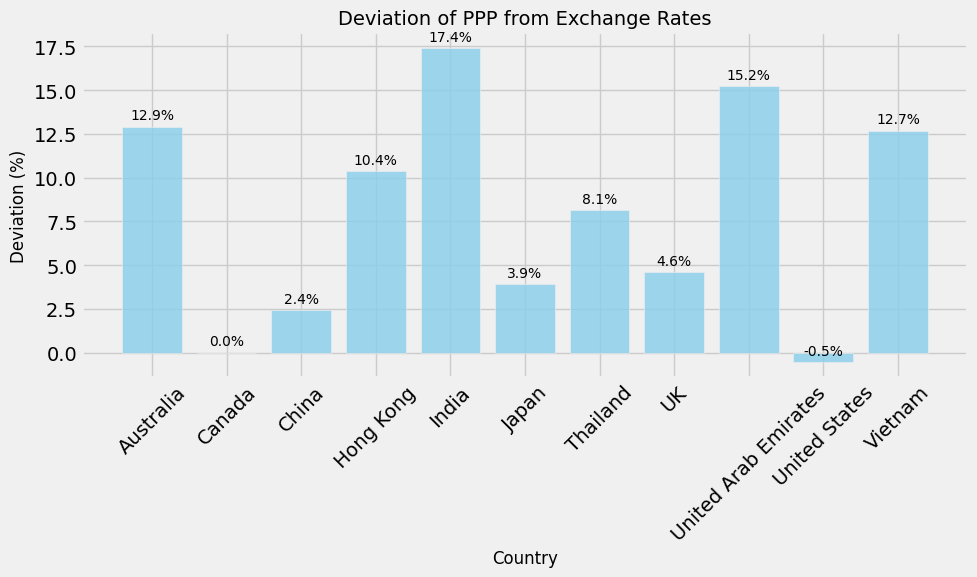

In [ ]:
countries_bar=PPP_table.column("Country")
deviation_percentage=PPP_table.column("Markup (%)")

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(countries_bar, deviation_percentage, color="skyblue", alpha=0.8)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Deviation (%)", fontsize=12)
ax.set_title("Deviation of PPP from Exchange Rates", fontsize=14)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As observed from the table above, the Purchasing Power Parity (PPP) value calculated from the conversions of INR is approximately \(70\), compared to the actual exchange rate of around \(60\) INR.

Since the PPP rate is greater than the actual exchange rate, this indicates that the currency is significantly undervalued, by approximately \(18\%\) which tells us that there are other factors involved for such a difference in prices.

#Conclusion

Based on further investigation, we can assume there are other factors affecting iphone price in different countries.

For example, just take price in India as reference, the main factor leads to pricer is the high import taxes."Consequently, Apple is subject to customs duties, which have a direct impact on the final prices. Additionally, the Goods and Services Tax (GST) of **18% **further contributes to the cost, resulting in a cumulative increase of **40% **in the final price."

Attribution notice
"https://economictimes.indiatimes.com/news/how-to/why-iphones-are-still-pricier-in-india-despite-made-in-india-production/articleshow/103682053.cms?from=mdr"
 By THE ECONOMIC TIMES NEWS

Despite the fact that since 2016, Apple has been manufaturing products in India, iphones are not entirely made in India but only assembled in India. Because of the supply chain, all the components required for iphone production are not manufactured in the same country, which potentially lead to the pricy cost.

In addtion, older-generation models drive the majority of sales for Apple in India, as the "Pro" models help it improve the affordability of base models and old_generation models. These iphones will become a better buy in India then other countries.

Attribution notice
"https://timesofindia.indiatimes.com/gadgets-news/why-made-in-india-iphones-do-not-lead-to-a-price-cut/articleshow/103676724.cms"
 By THE TIMES OF INDIA

In conclusion, we can suggest three factors are affecting iphone's price in different countries. 1 import duties, 2 cost, 3 the sales of older-generation models differences
